# EDA & Feature Engineering with Algerian_Forest_fires_dataset_csv

In [1]:
#import required libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline




# read the dataset

In [2]:
df = pd.read_csv(r'E:\\himanshu_2022\\Download\\Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [48]:
# only 5 rows ...
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire,0.0
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire,0.0
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire,0.0
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,notfire,0.0
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,notfire,1.0
241,28,9,2012,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,notfire,1.0
242,29,9,2012,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,notfire,1.0


In [4]:
# drop rows which have no information..
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [5]:
# creating region feature..
df.loc[:122,'region'] = '0'
df.loc[122:, 'region'] = '1'

In [6]:
#datatype & describe...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [7]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,0
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


# data cleaning

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [9]:
#stripping the names of the column...
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [10]:
df=df.astype(str)

In [11]:
#somes values in colums also have space
for feature in ['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    df[feature]= df[feature].str.replace(" ","")

In [12]:
#index no 165 for feature name FWI has value fire
df[df['FWI']== 'fire'].index

Int64Index([165], dtype='int64')

In [13]:
### replacing fire value witha float value
df.loc[165,'FWI']=' 0.1'

In [14]:
#replacing nan value with fire to make data equal to the info given in dataset 
df[df['Classes']== 'nan'].index
df.loc[165,'Classes']='fire'

# changing the data types of the columns

In [15]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)
df['region']=df['region'].astype(float)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  region       244 non-null    float64
dtypes: float64(7), int32(5), object(3)
memory usage: 24.0+ KB


# checking the null value

In [17]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [18]:
# here is no null value

# Observation

In [19]:
# there is no null value 

In [20]:
df.shape ## 244 rows & 16 columns...

(244, 15)

# Numerical and Continuous features

# categorical features

In [21]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes=='O' ]

#catgorical features with group by operation with count...
for feature in categorical_feature:
    print(df.groupby(feature)['region'].value_counts())

DC     region
10     0.0       2
10.2   0.0       1
10.4   1.0       1
10.5   1.0       1
100.7  0.0       1
                ..
94.7   0.0       1
96.8   1.0       1
97.3   1.0       1
98.6   0.0       1
99     1.0       1
Name: region, Length: 213, dtype: int64
FWI   region
 0.1  1.0       1
0     0.0       7
      1.0       2
0.1   0.0       7
      1.0       2
               ..
9.6   1.0       1
9.7   0.0       1
9.8   1.0       1
9.9   0.0       1
      1.0       1
Name: region, Length: 161, dtype: int64
Classes  region
fire     1.0       79
         0.0       59
notfire  0.0       63
         1.0       43
Name: region, dtype: int64


<AxesSubplot:xlabel='Classes', ylabel='count'>

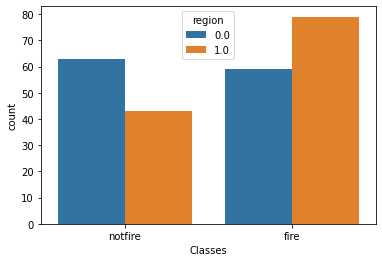

In [22]:
sns.countplot(data=df, x='Classes', hue='region')

# Numerical features

In [24]:
# Getting list for numerical features..
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print(numerical_features)

['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'region']


In [26]:
df[numerical_features].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
ISI            106
BUI            174
region           2
dtype: int64

# Seggregating discrete and continuous variable

# Discrete numercal features

In [28]:
# here is the assumption to consider if discrete values is less tha 35 that will be consider continuous features...
descrete_features = [feature for feature in numerical_features if len(df[feature].unique())<35]
descrete_features


['day', 'month', 'year', 'Temperature', 'Ws', 'region']

# target features

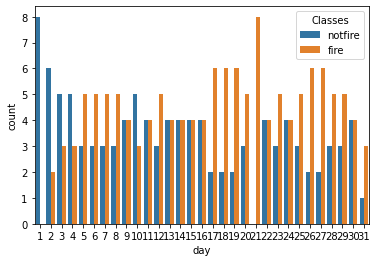

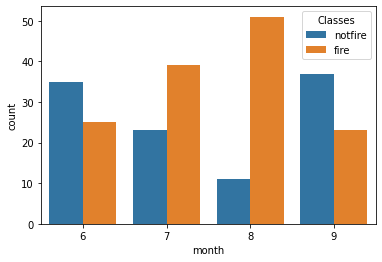

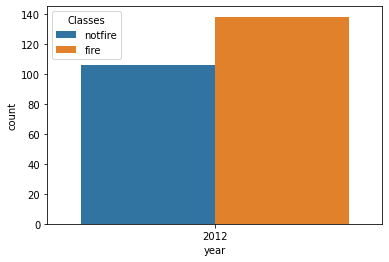

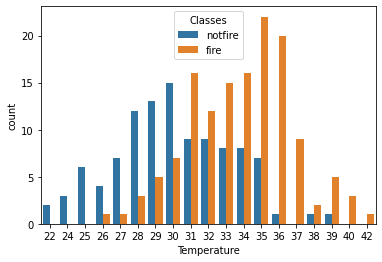

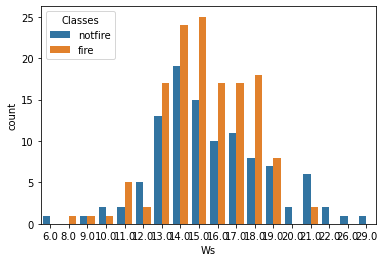

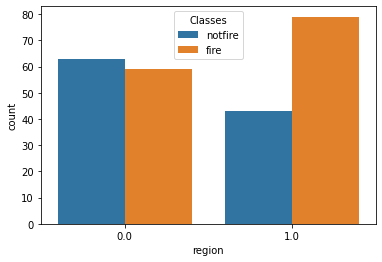

In [30]:
# this is bivariate analysis between target features classes and discrete numerical features
# plot
for features in descrete_features:
    sns.countplot(data = df, x=features , hue='Classes')
    plt.show()

# continuous numerical features

In [34]:
continuous_features=[feature for feature in numerical_features if feature not in descrete_features]
print(continuous_features)

['RH', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']


# distribution of continuous numerical features

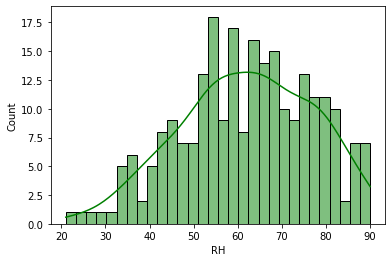

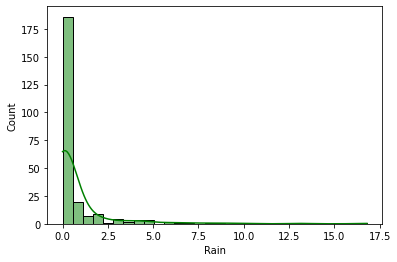

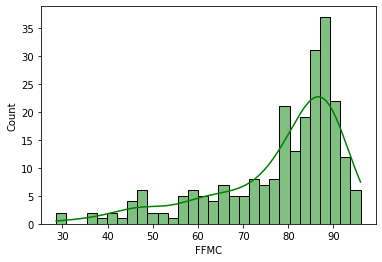

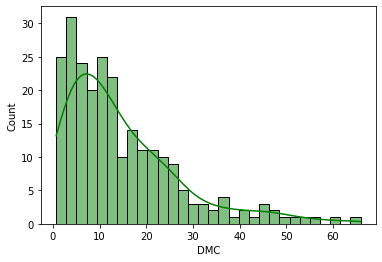

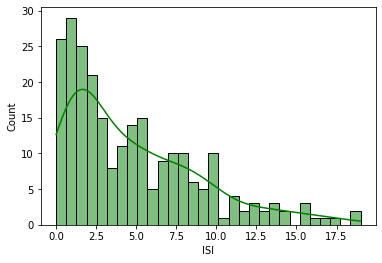

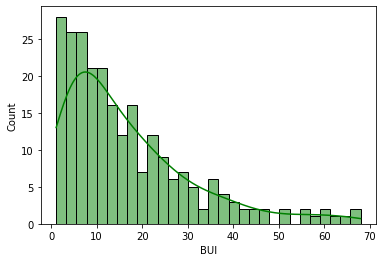

In [35]:
# checking distribution of continuous numerical features..
for feature in continuous_features:
    sns.histplot(data=df, x=feature,kde=True, bins=30, color='green')
    plt.show();

# checking the Outliers

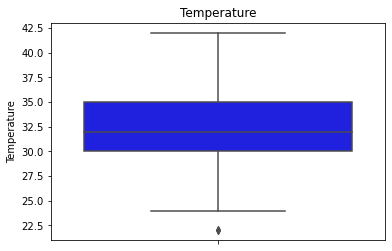

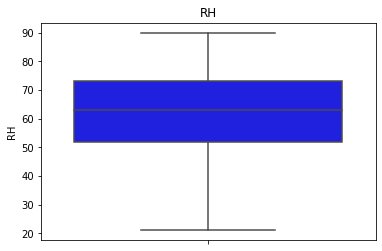

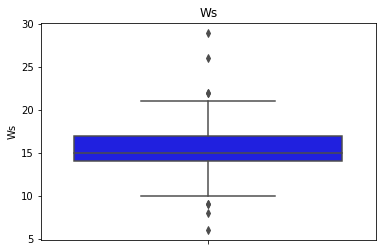

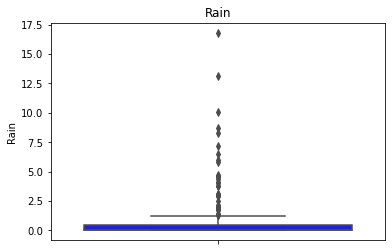

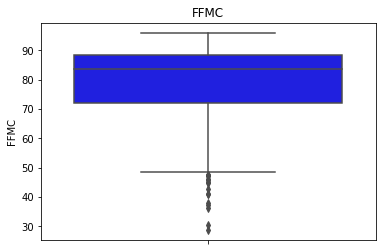

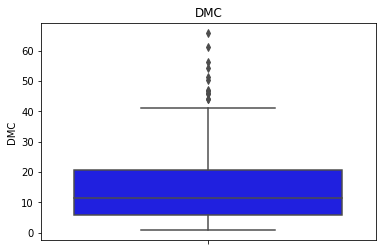

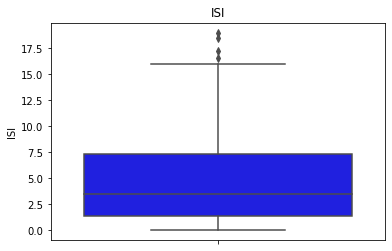

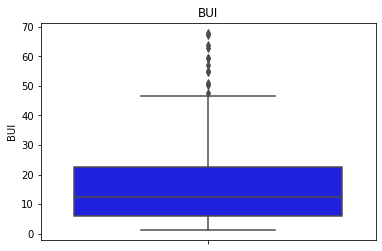

In [38]:
for feature in [feature for feature in numerical_features if feature not in ['day','month','year','region']]:
    sns.boxplot(data =df,y = feature , color = 'b')
    plt.title(feature)
    plt.show()

# correlation  between each numerical features

In [39]:
data= round(df[[feature for feature in numerical_features if feature not in ['day', 'month','year', 'Region']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.61,0.46,0.27
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.69,-0.35,-0.41
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.02,0.03,-0.18
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.35,-0.30,-0.04
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.74,0.59,0.22
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.67,0.98,0.19
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,1.00,0.64,0.27
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.64,1.00,0.09
region,0.27,-0.41,-0.18,-0.04,0.22,0.19,0.27,0.09,1.00


# Heatmap to visualise the correlation

<AxesSubplot:>

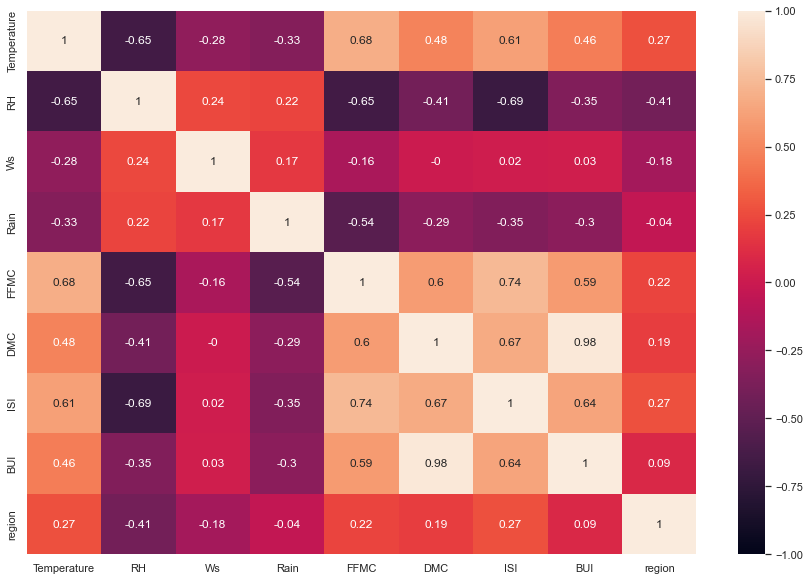

In [40]:
# Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=data, annot=True,  vmin=-1, vmax=1)

# Relantionship  between numerical feature and target feature

# 1. strip plot

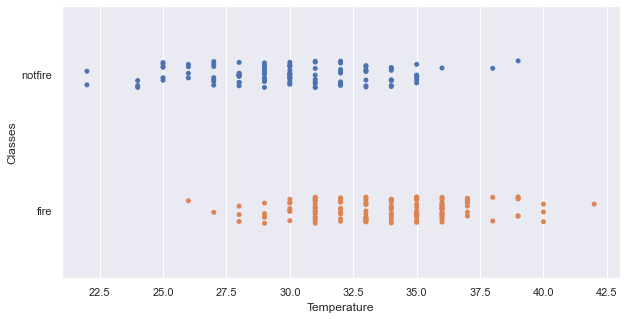

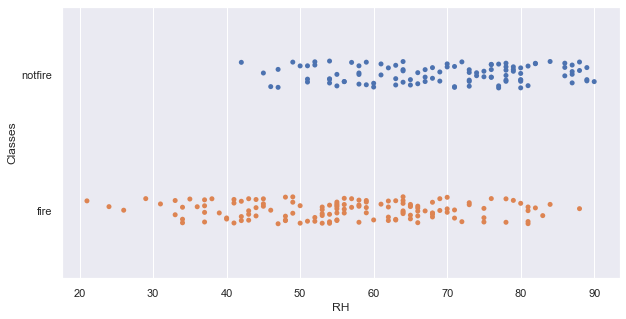

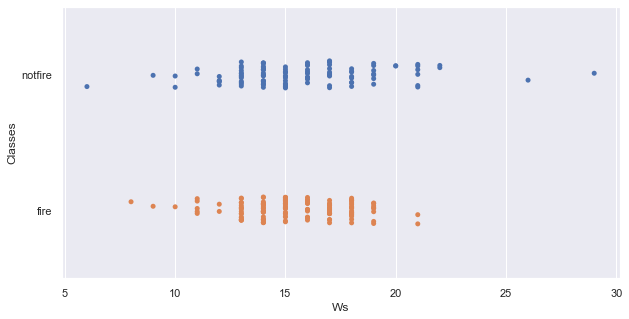

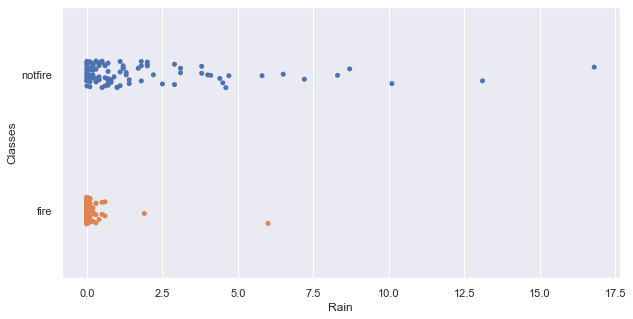

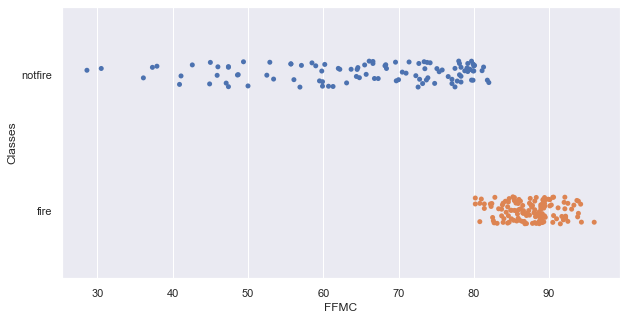

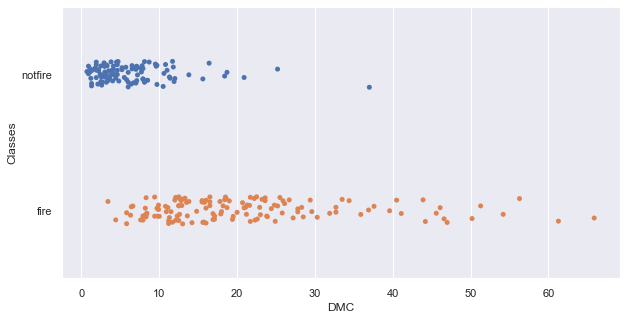

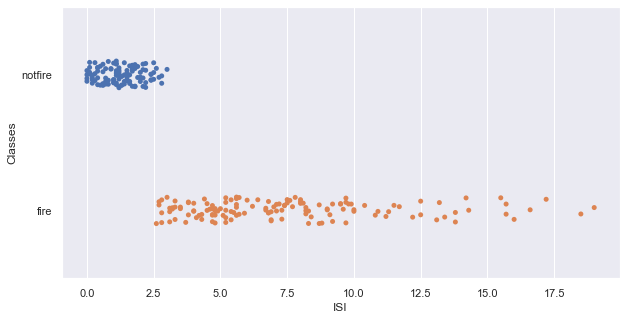

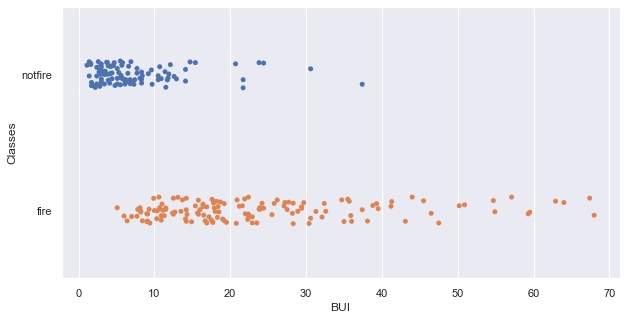

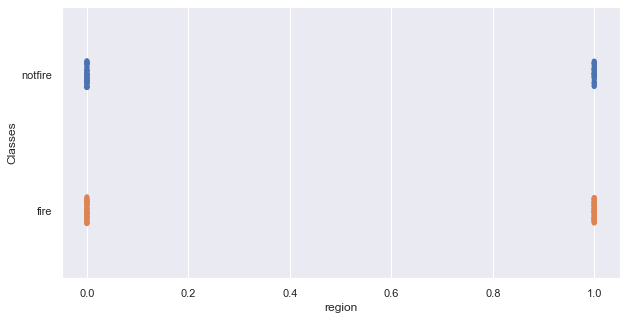

In [41]:
num_feature_custom=[feature for feature in numerical_features if feature not in ['day', 'month', 'year', 'Region']]

sns.set(rc={'figure.figsize':(10,5)})
for feature in num_feature_custom:
    sns.stripplot(data=df, x=feature, y='Classes')
    plt.show();

# Feature vs target

# 1.day

<AxesSubplot:xlabel='day', ylabel='count'>

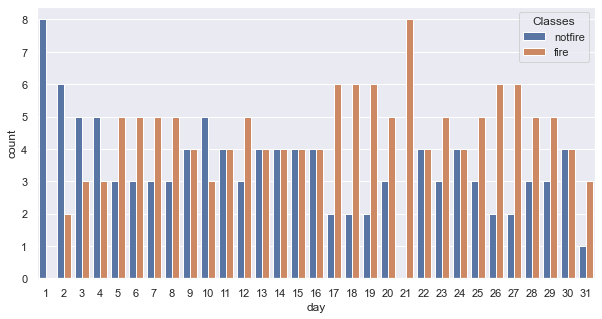

In [44]:
sns.countplot(data=df, x='day', hue='Classes')

# 2. month

<AxesSubplot:xlabel='month', ylabel='count'>

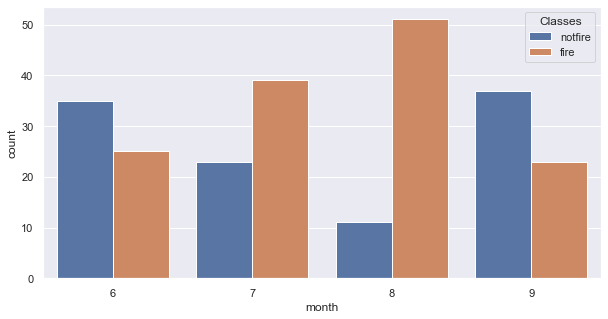

In [45]:
sns.countplot(data=df,x= 'month',hue= 'Classes')

# 3.year

<AxesSubplot:xlabel='year', ylabel='count'>

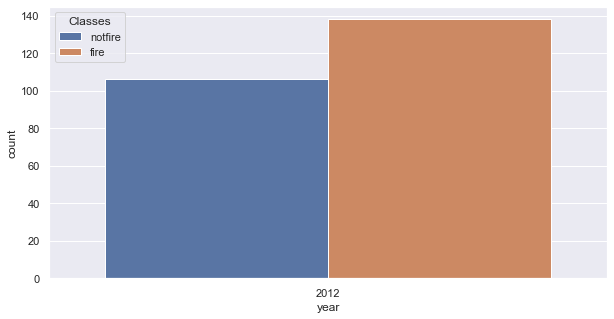

In [46]:
sns.countplot(data=df,x= 'year',hue= 'Classes')

# 4. region

<AxesSubplot:xlabel='region', ylabel='count'>

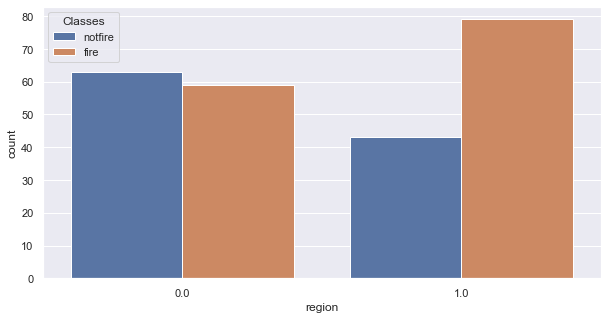

In [47]:
sns.countplot(data=df,x= 'region',hue= 'Classes')